In [2]:
#shap
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

/opt/anaconda3/envs/bhl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("../data/data_scaled.csv")

In [4]:
X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
params = {'colsample_bytree': 0.4, 'gamma': 0.1, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.8}
model = XGBClassifier(**params)

In [6]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [7]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

In [9]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train.iloc[0, :])

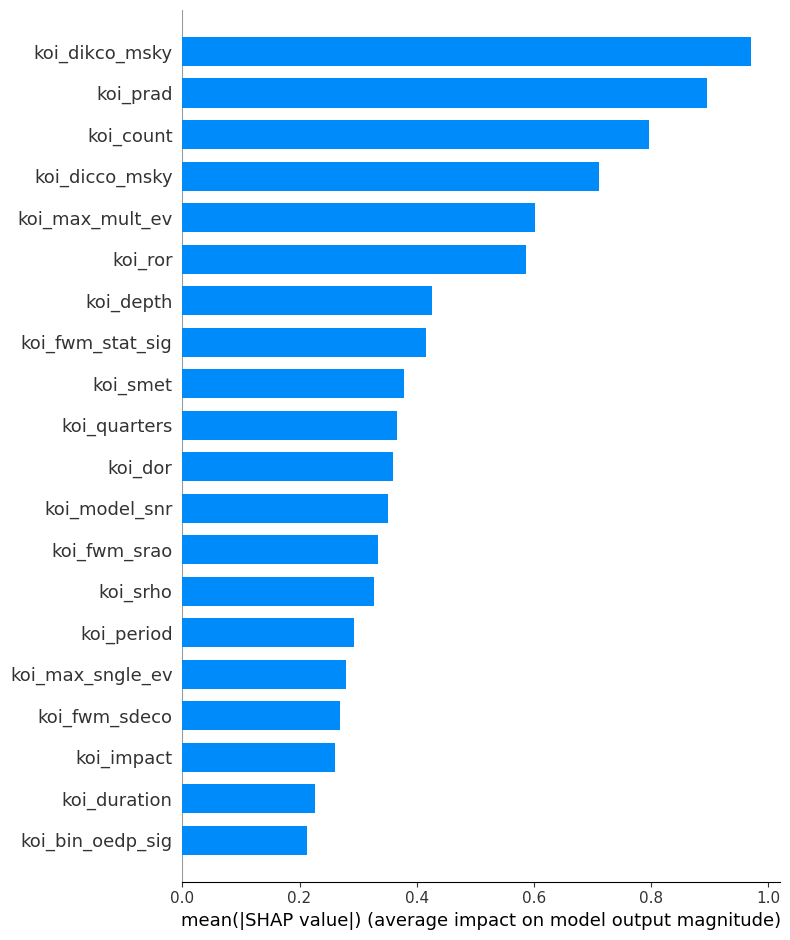

In [10]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

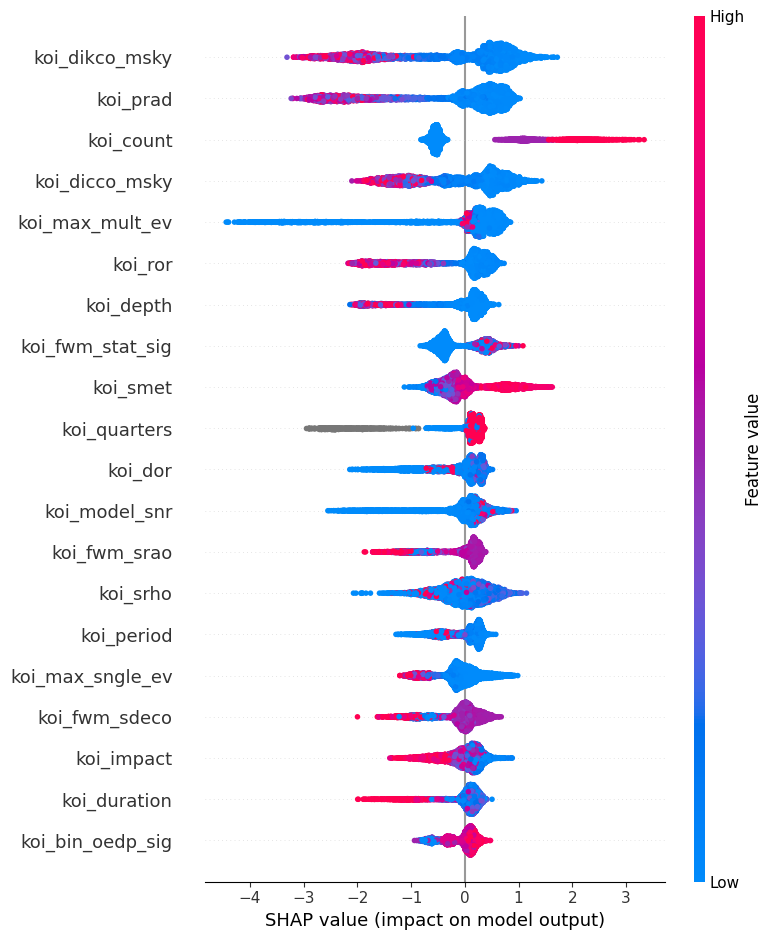

In [11]:
shap.summary_plot(shap_values, X_train)

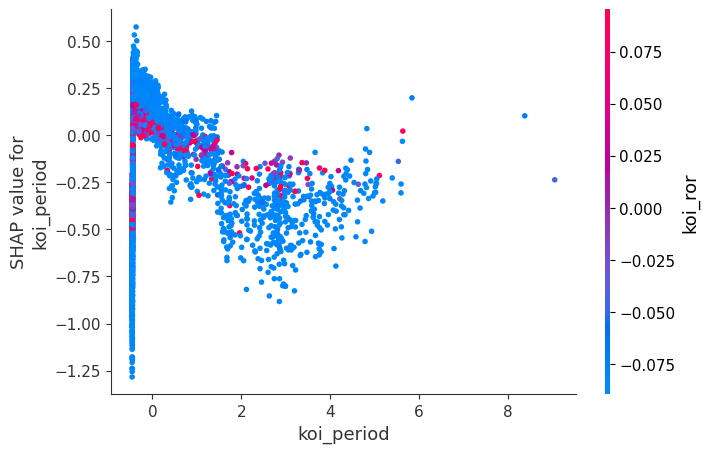

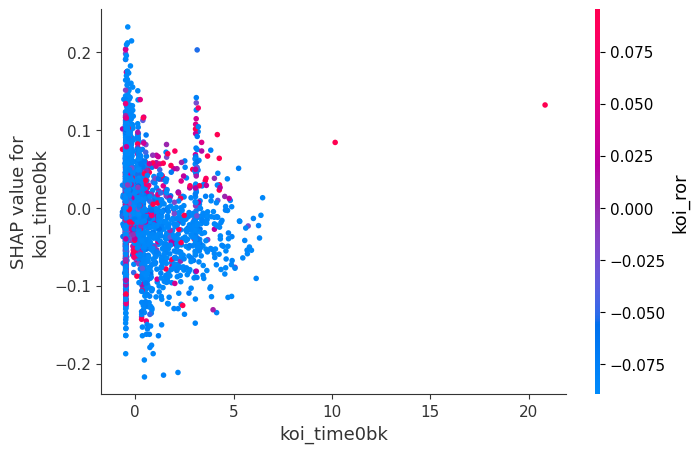

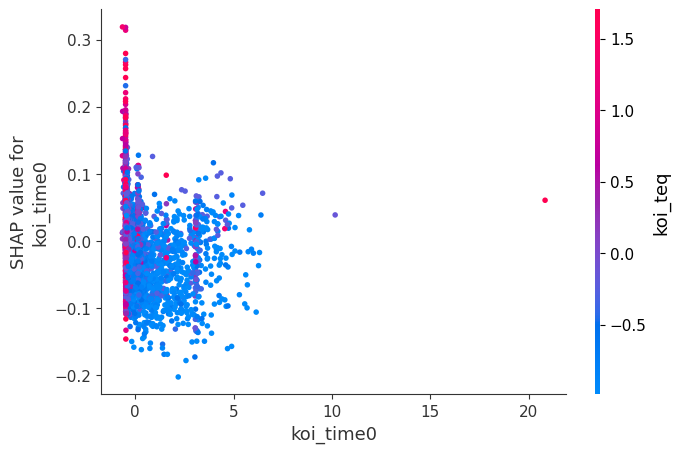

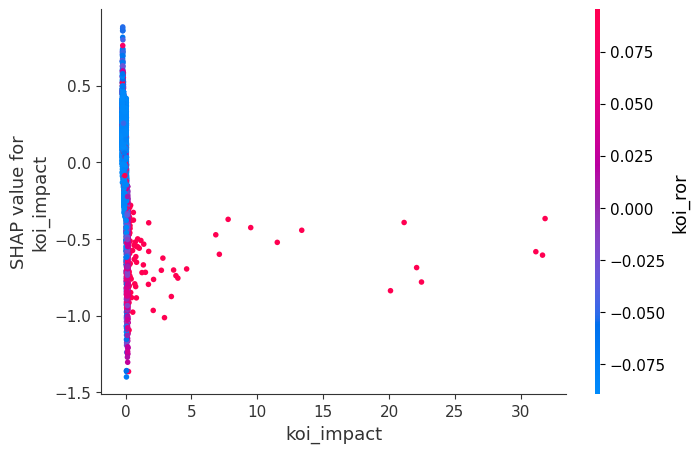

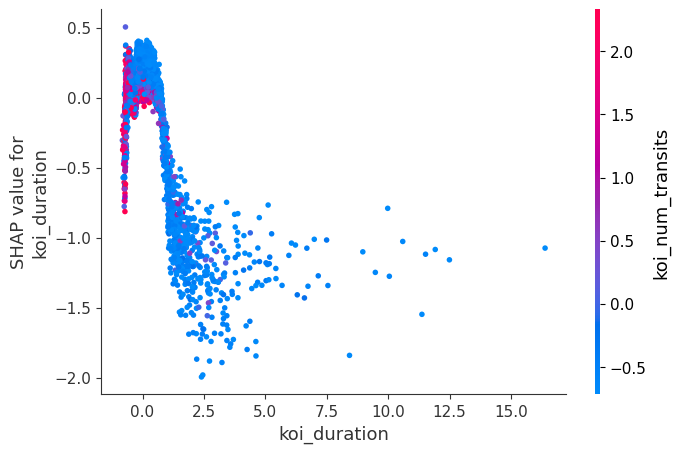

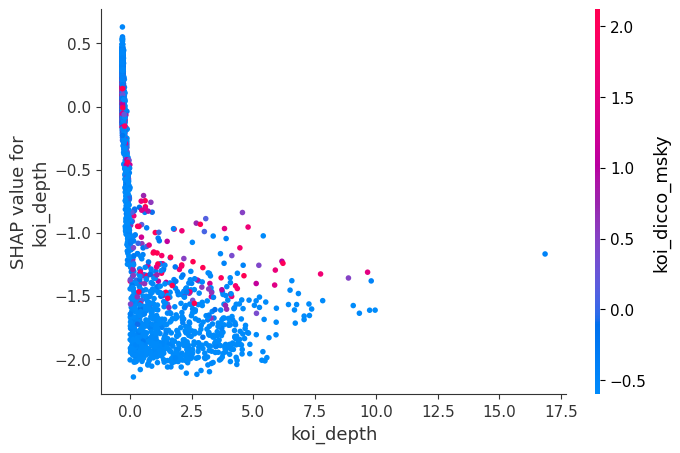

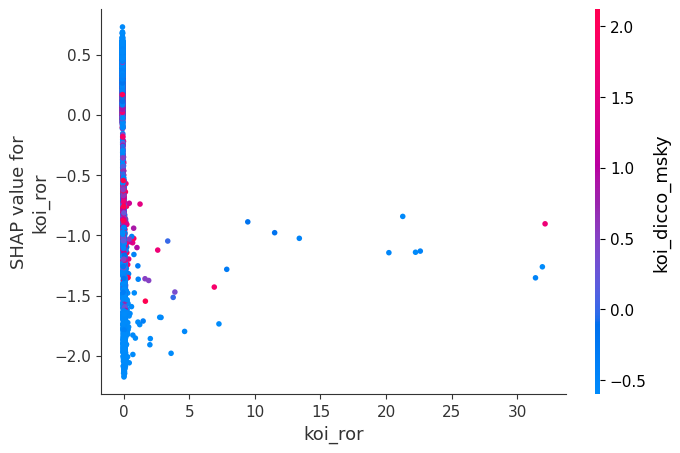

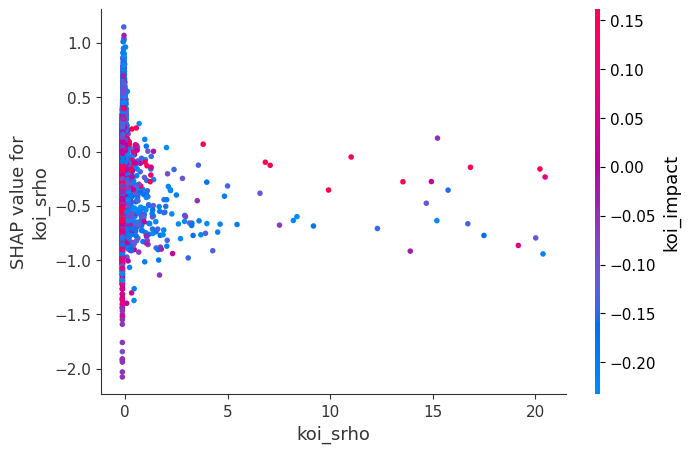

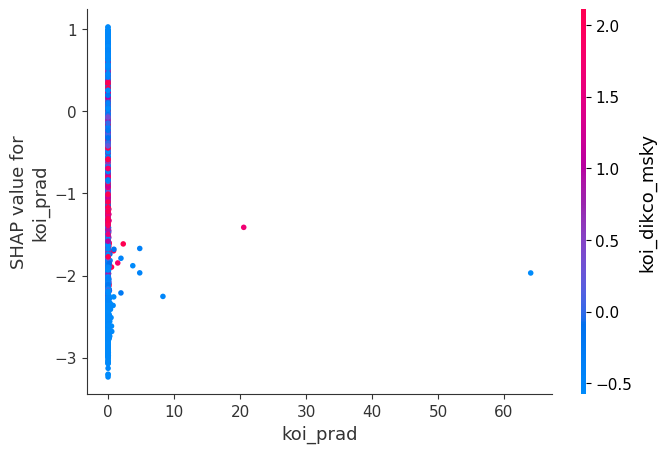

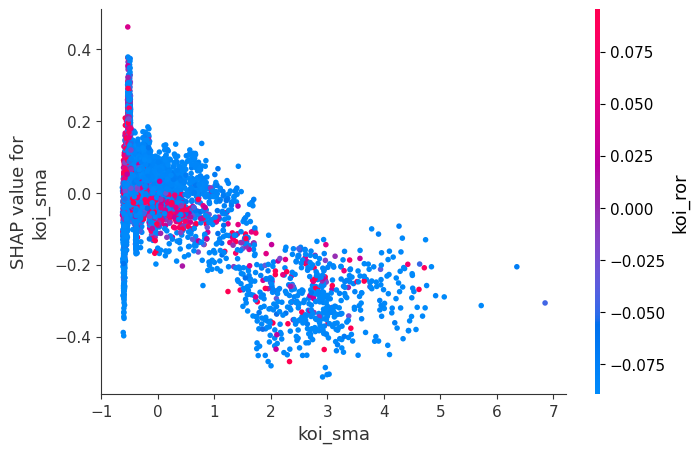

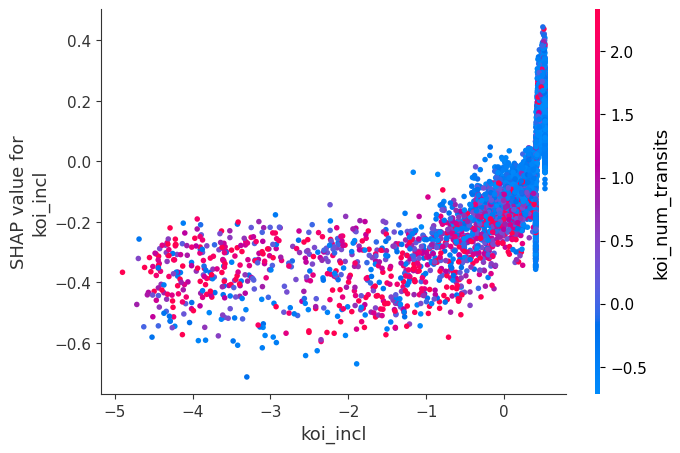

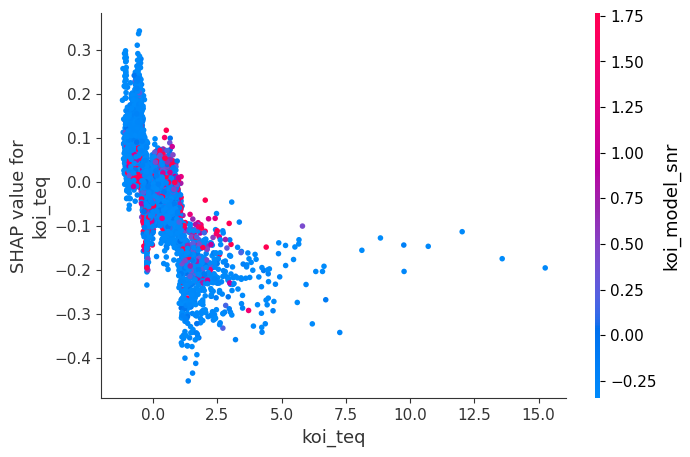

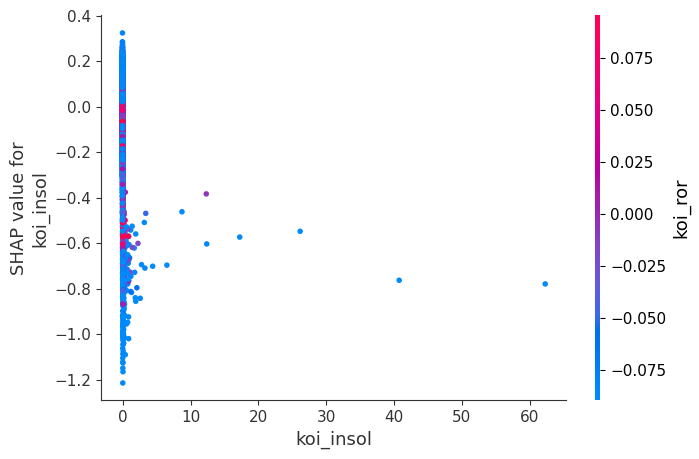

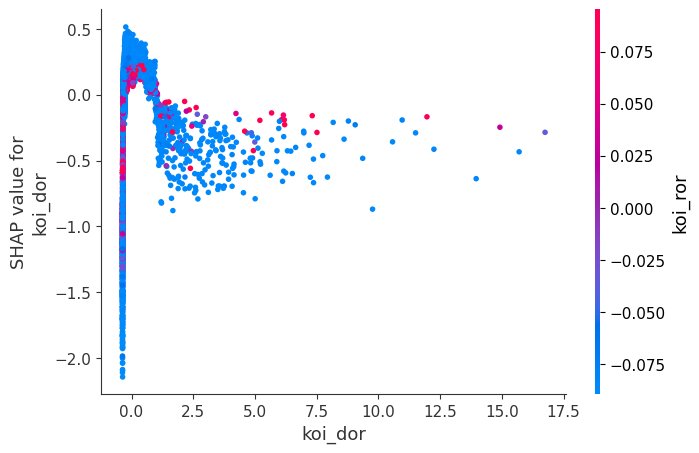

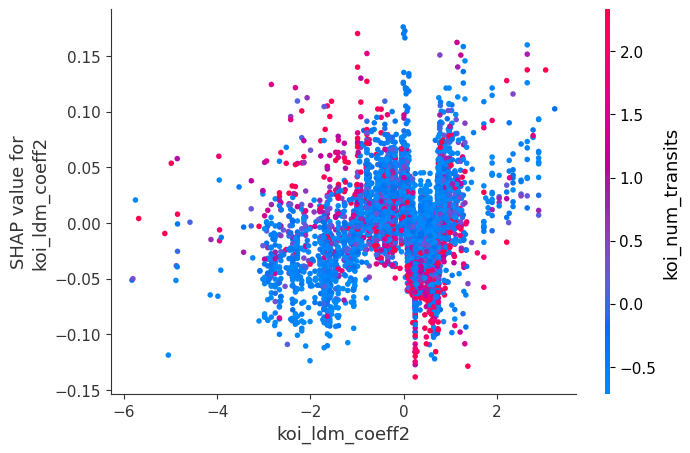

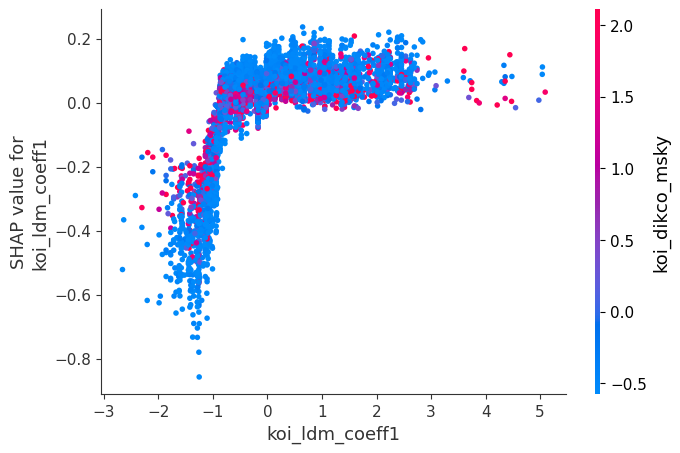

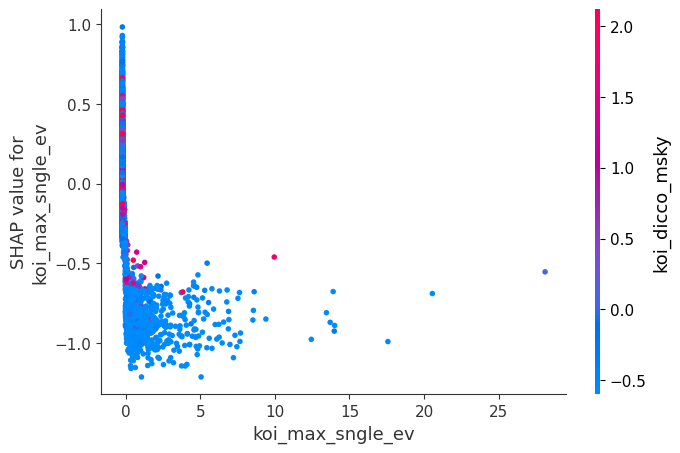

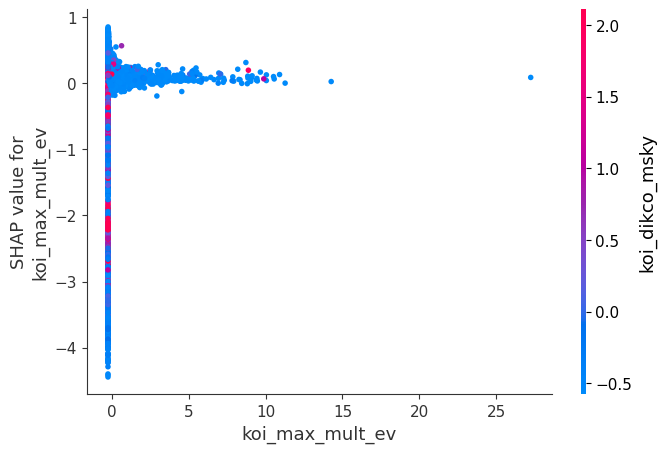

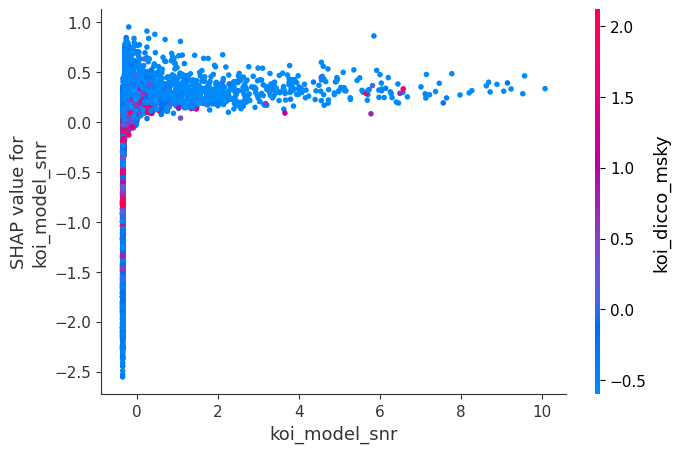

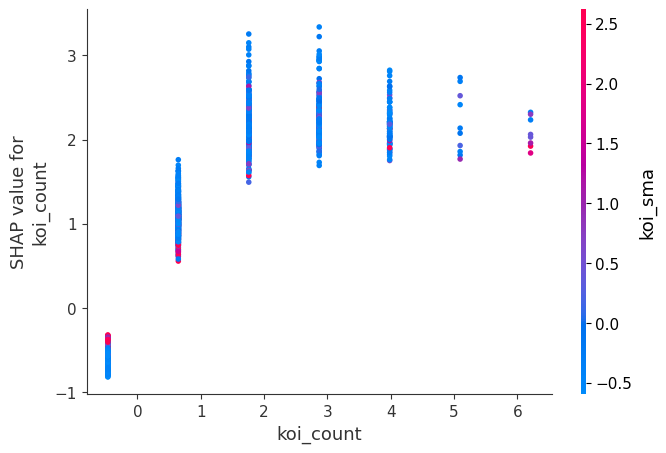

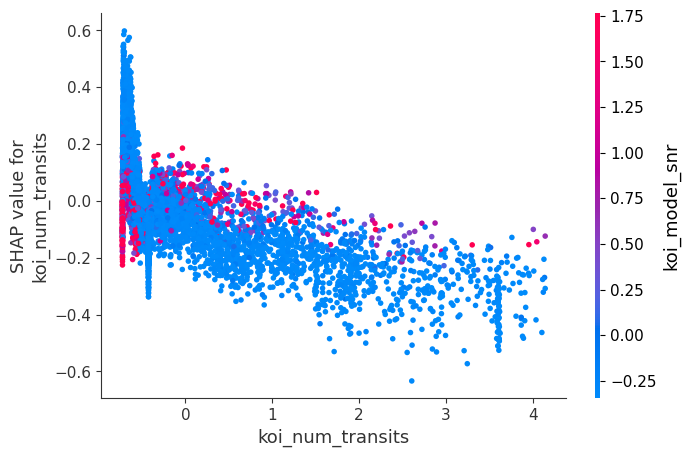

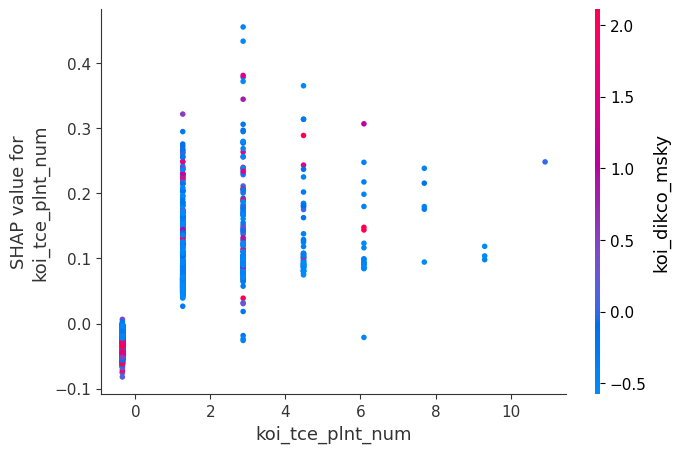

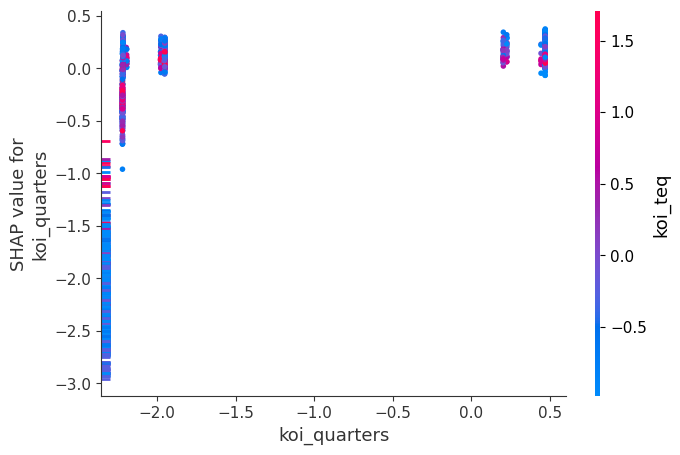

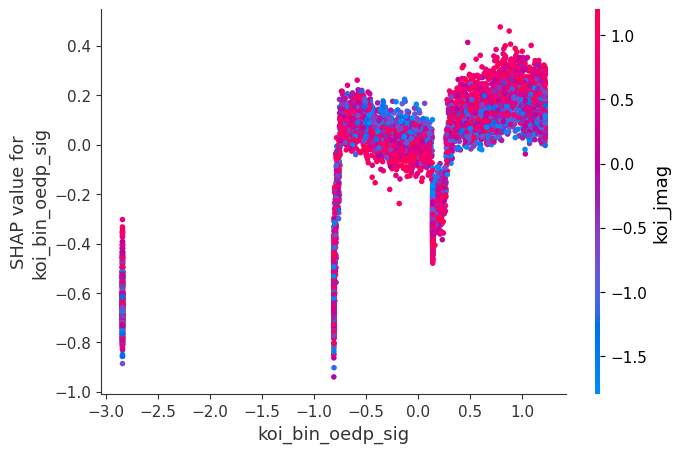

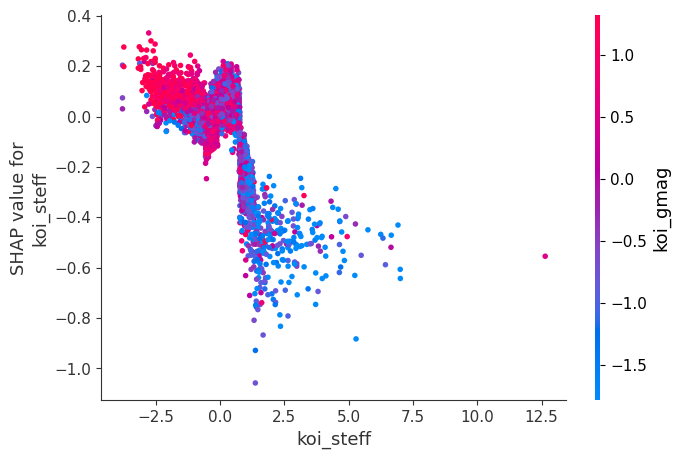

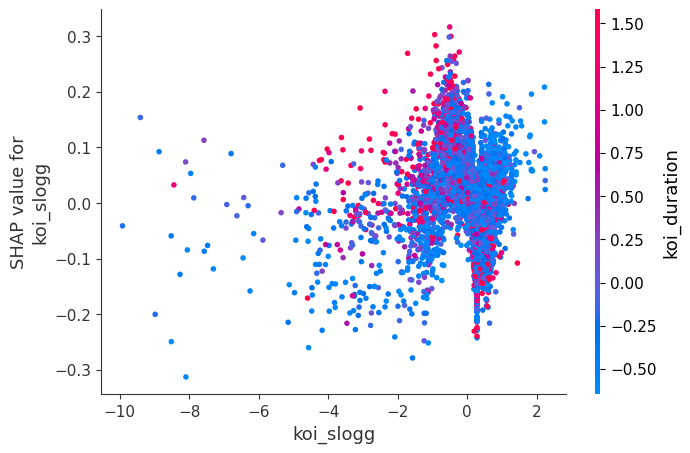

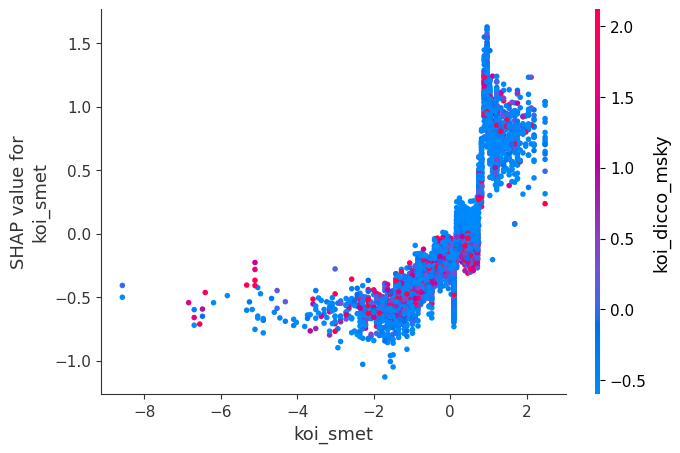

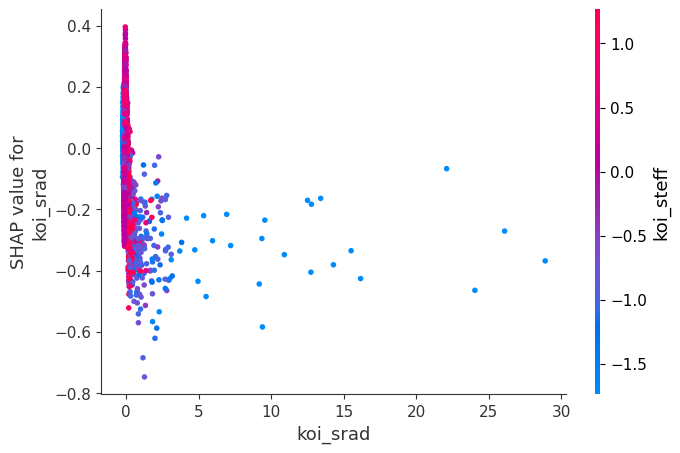

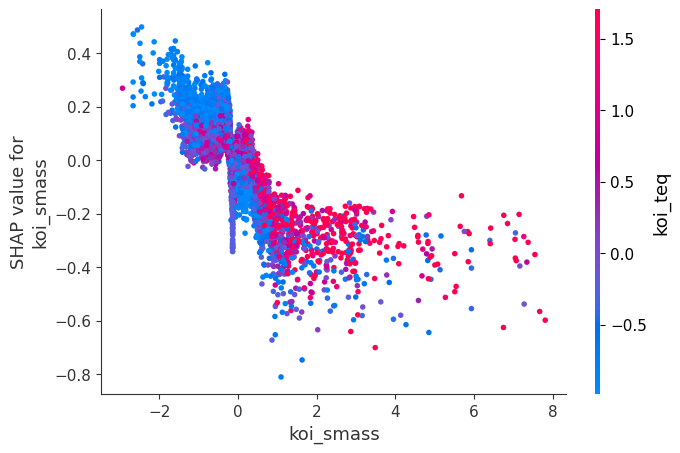

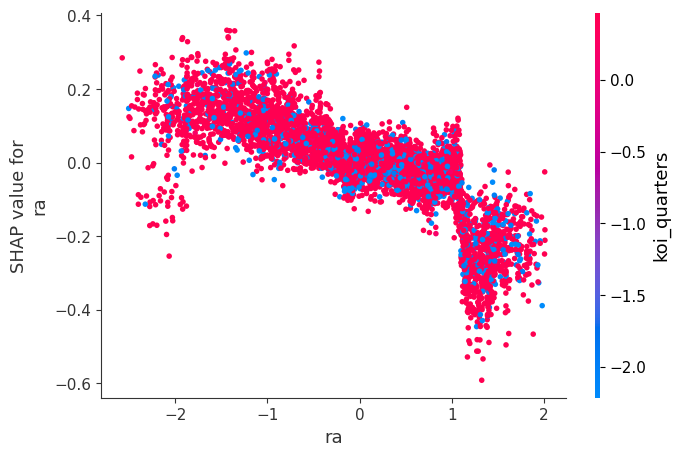

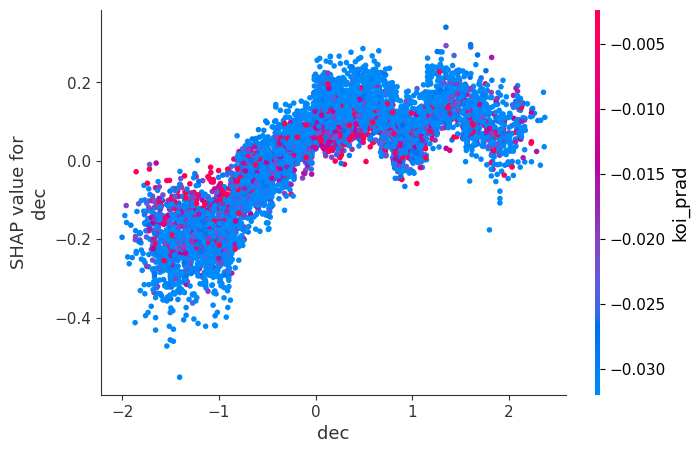

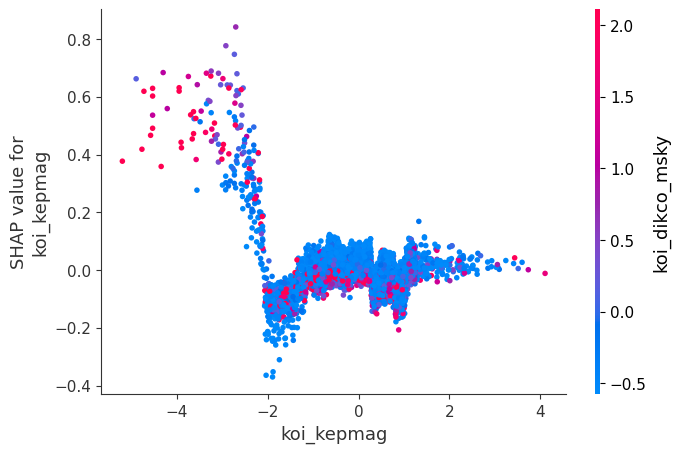

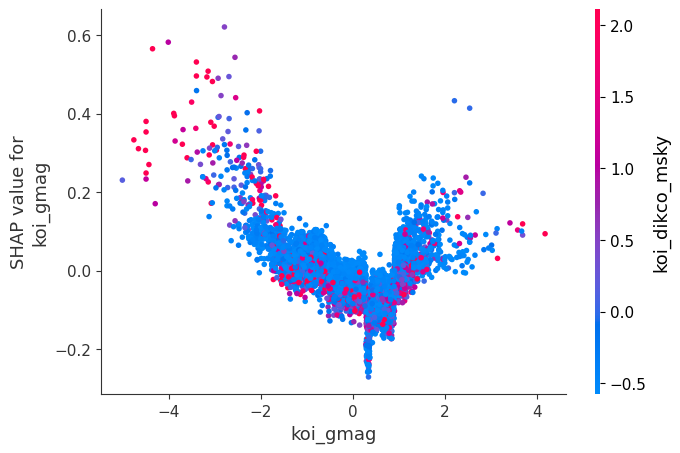

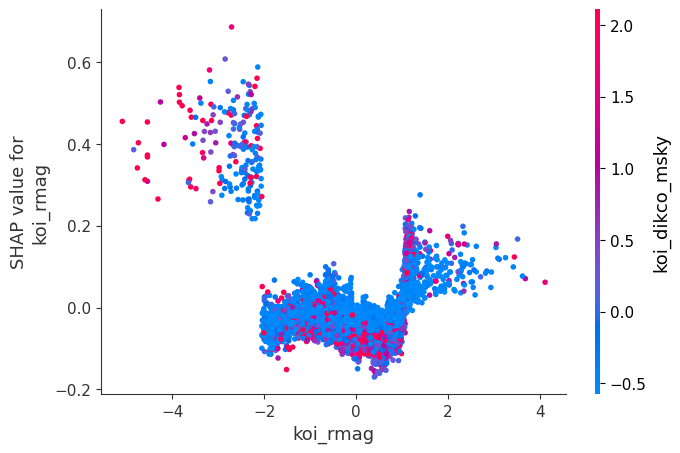

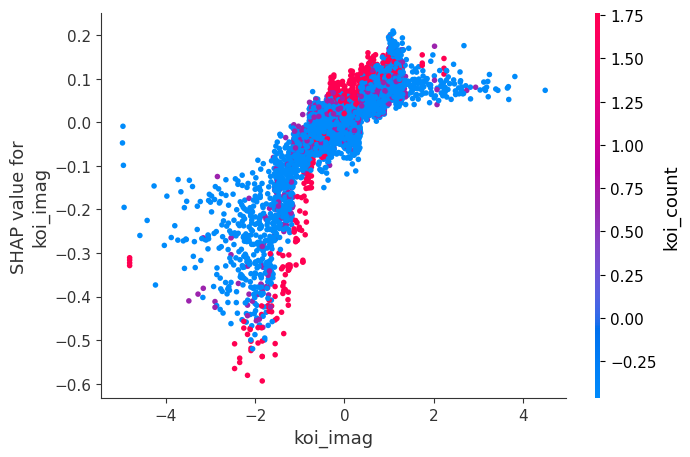

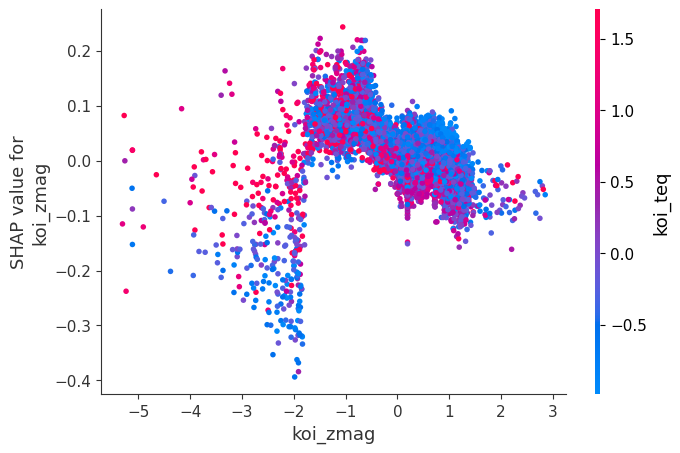

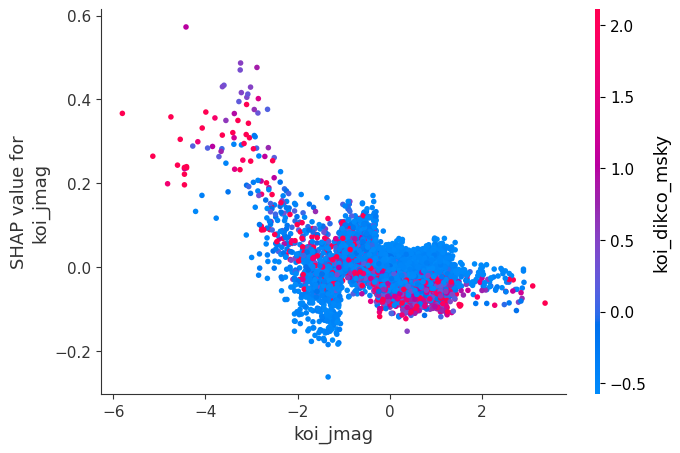

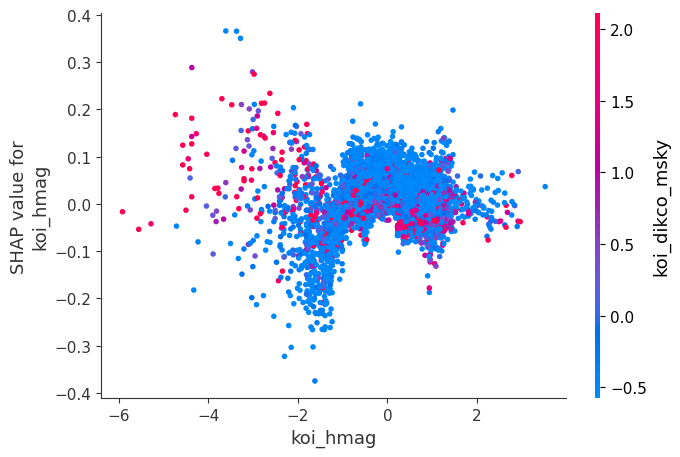

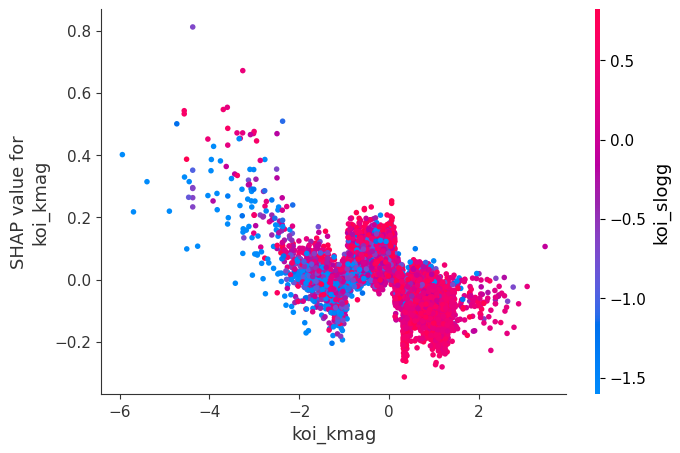

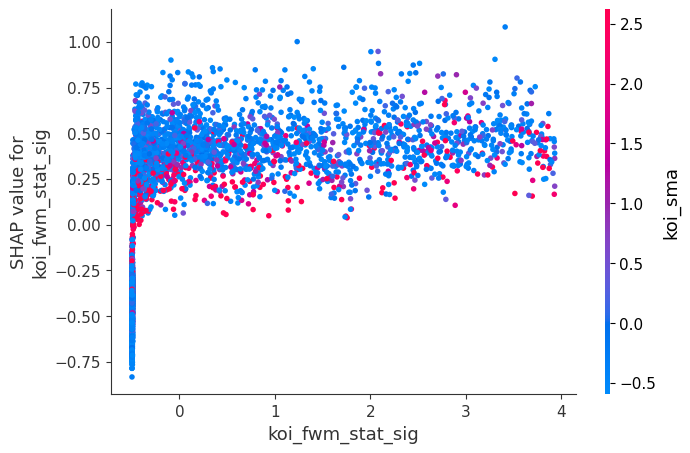

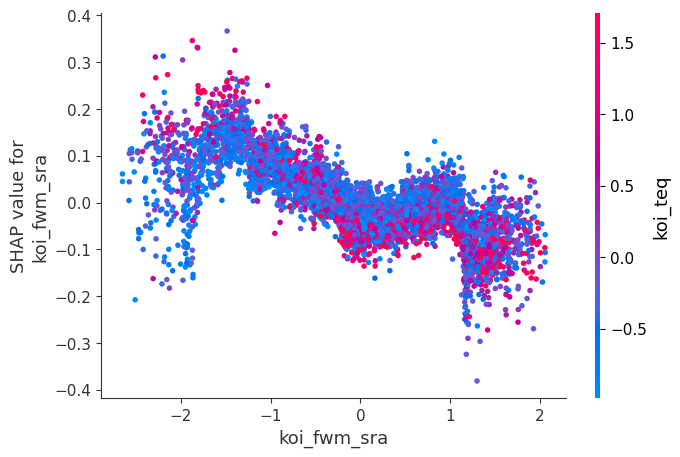

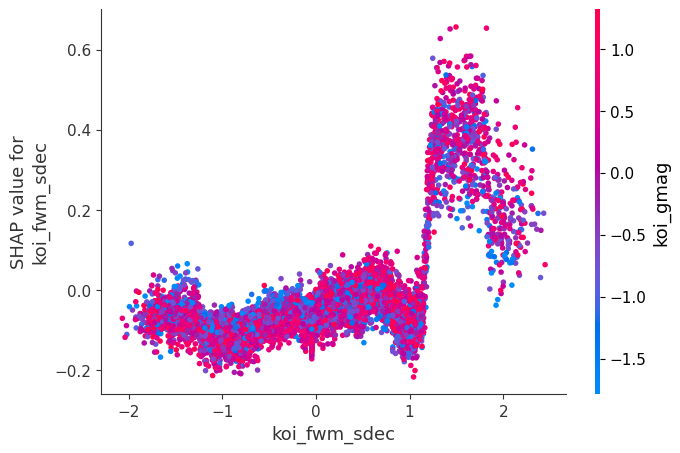

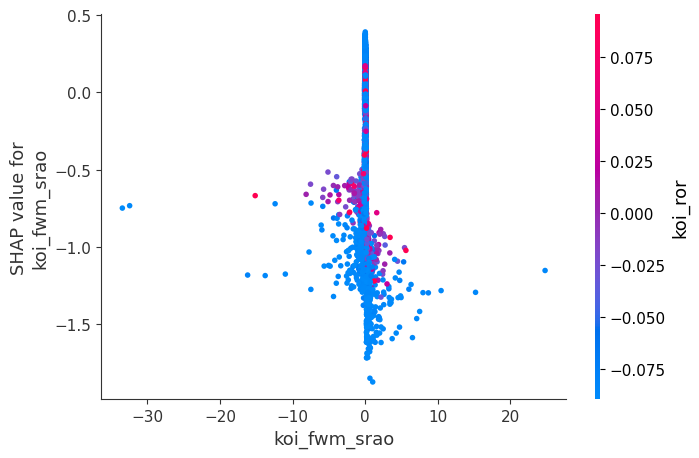

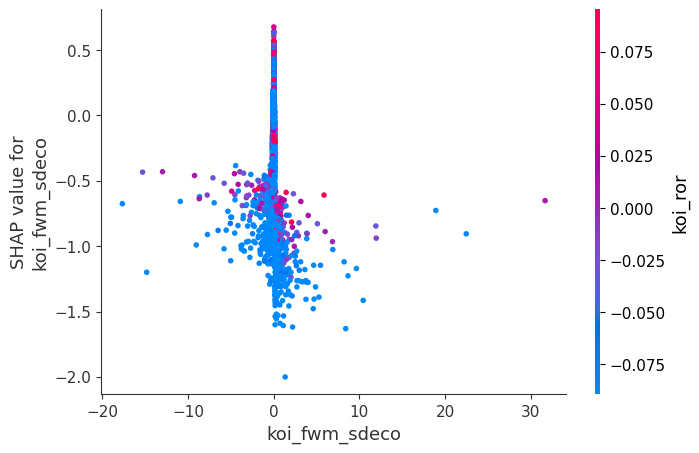

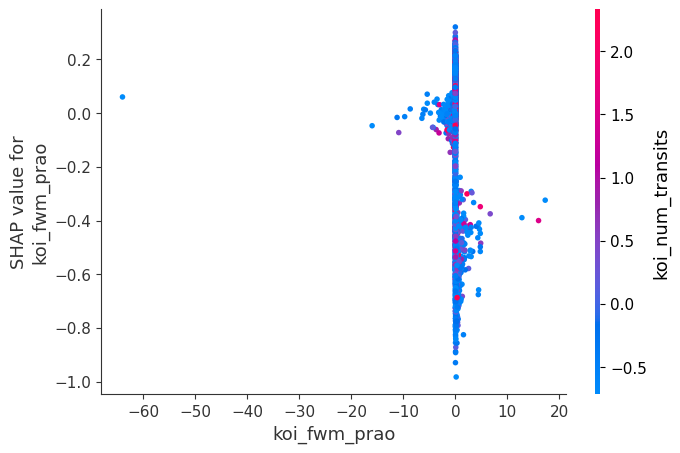

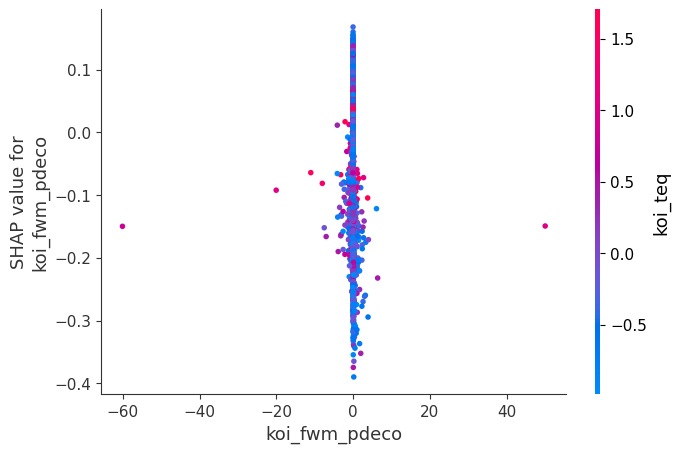

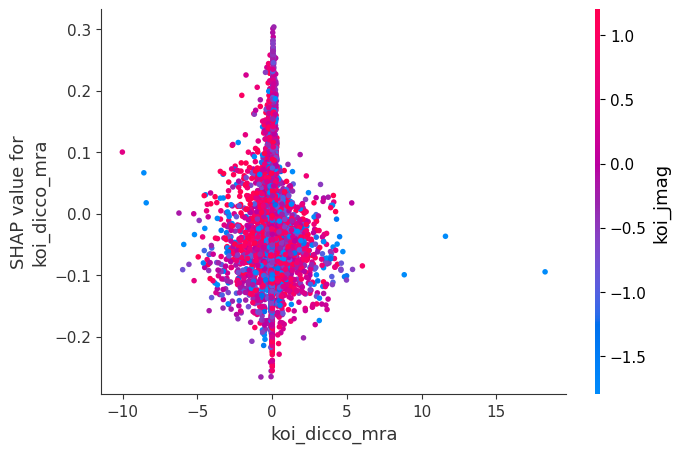

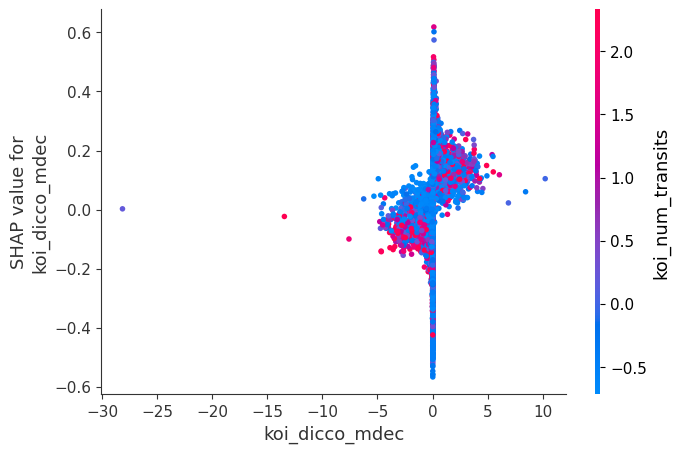

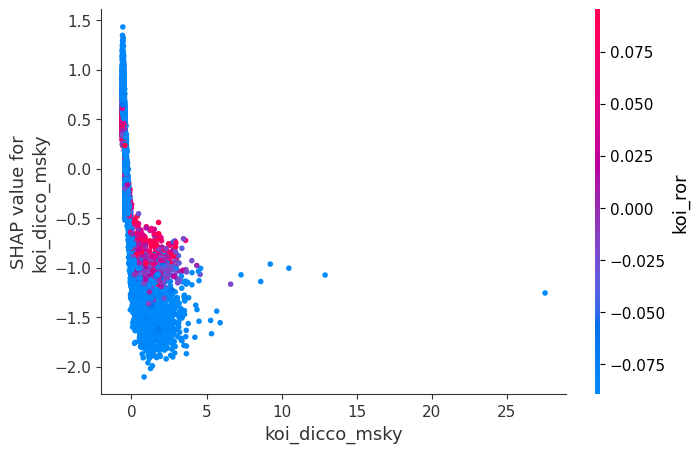

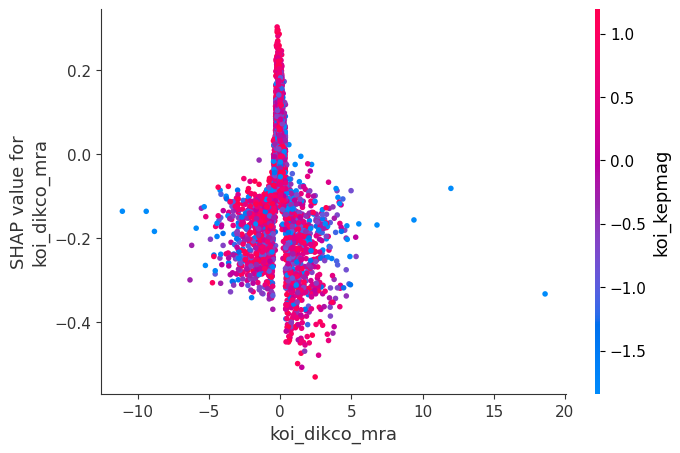

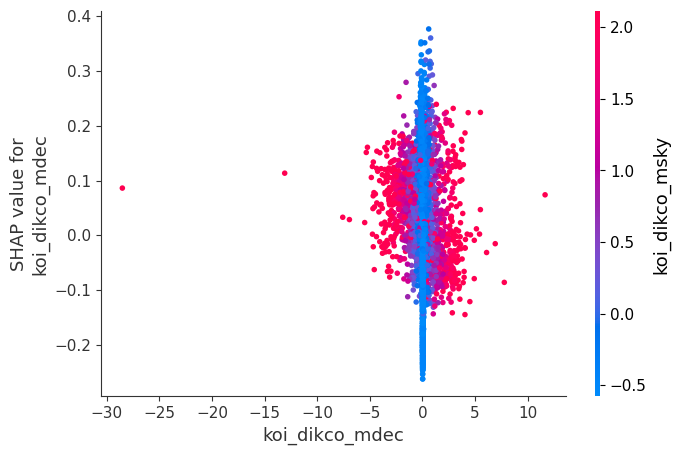

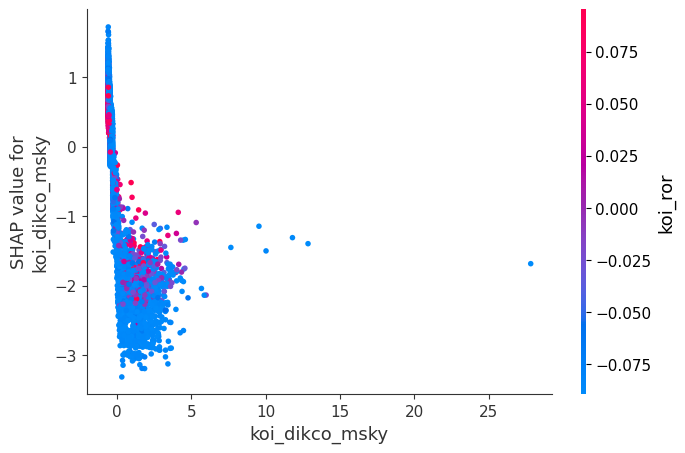

In [12]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train, display_features=X_train)